**FINAL PROJECT**

Ok, first we are going to get everything set up by importing the useful libraries (pandas, numpy, and matplot).

In [55]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Awesome!

The first metric we will be analyzing is playing fields.

***Playing Fields***

![playing fields](https://www.usu.edu/campusrec/images/ALF%20for%20tv%20small.jpg)

Now, lets read in the data set for playing fields around Pittsburgh and take a look.

In [56]:
playing_fields = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23")
playing_fields.head()

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


Ok everything looks good.

Before we do anything else, why don't we get a better picture of the neighborhoods we are dealing with here.

In [57]:
playing_fields["neighborhood"].unique()

array(['South Side Slopes', 'South Side Flats', 'Lower Lawrenceville',
       'Banksville', 'Allentown', 'Brighton Heights', 'Hazelwood',
       'Lincoln-Lemington-Belmar', 'Windgap', 'Troy Hill',
       'South Oakland', 'Brookline', 'Arlington', 'Mount Washington',
       'Crafton Heights', 'East Hills', 'East Liberty', 'Highland Park',
       'Squirrel Hill South', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Perry South', 'Perry North',
       'Elliott', 'Beechview', 'Morningside', 'Central Lawrenceville',
       'Bedford Dwellings', 'Terrace Village', 'Larimer', 'Beltzhoover',
       'Greenfield', 'Manchester', 'Allegheny Center', 'Central Oakland',
       'Lincoln Place', 'Sheraden', 'Shadyside', 'Spring Garden',
       'Oakwood', 'Stanton Heights', 'Carrick', 'Marshall-Shadeland',
       'Spring Hill-City View', 'West End', 'Polish Hill', 'Westwood',
       'Squirrel Hill North', 'Homewood South'], dtype=object)

That gives us the names of the individual neighborhoods, but what about knowing exactly how many we are working with.

We can easily check this with a small change to the previous code

In [58]:
playing_fields["neighborhood"].nunique()

51

Ok, how about how many playing fields we need to consider.

In [59]:
len(playing_fields)

113

That's actually pretty good, especially considering that a significant amount of the data set covers urban regions, which makes it somewhat more difficult to find the land needed for playing fields.

Now, lets breakdown the data set to analyze how the playing fields are distributed by neighborhood

In [60]:
playing_fields["neighborhood"].value_counts()

Brighton Heights            7
South Side Slopes           6
Brookline                   6
Squirrel Hill South         5
Carrick                     5
Highland Park               4
Hazelwood                   4
Lower Lawrenceville         4
Beltzhoover                 3
Shadyside                   3
Troy Hill                   3
Sheraden                    3
Beechview                   3
Morningside                 3
Mount Washington            3
Spring Hill-City View       2
Manchester                  2
Westwood                    2
Perry North                 2
Regent Square               2
South Side Flats            2
Allegheny Center            2
Bedford Dwellings           2
Banksville                  2
Crafton Heights             2
Central Lawrenceville       2
South Oakland               2
Elliott                     2
Lincoln-Lemington-Belmar    2
Greenfield                  2
Lincoln Place               1
East Liberty                1
Marshall-Shadeland          1
Arlington 

This gives us a solid idea of the distribution of playing fields across the various neighborhoods in Pittsburgh, but we can create a visual representation as well to add some more insight.

In [ ]:
playing_fields["neighborhood"].value_counts().plot(kind="bar")

From both representations of the data, we see that there isn't a ton of variability in the amount of playing fields per neighborhood; however, there are definitely a few neighborhoods that stand out at the top, for instance Brighton Heights leading the pack with seven.

Lets take a closer look at the top five.

In [ ]:
playing_fields["neighborhood"].value_counts().head().plot(kind="bar")

Perfect, we have our top five comprised of Brighton Heights, South Side Slopes, Brookline, Squirrel Hill South, and Carrick. We could simply end our investigation here, but the data has a few quirks that we should consider.

As we look through the data set, it seems designed to consider mainly baseball fields, with individual field locations classified by the shape(s)/usage of the field(s). Lets examine what types of fields we are working with. 

In [11]:
playing_fields["field_usage"].unique()

array(['Diamond Only', 'Diamond and Rectangular', 'Rectangular Only'],
      dtype=object)

So, there are fields used only for the diamond, rectangular fields that lack a diamond, and locations that are multi-purpose, offering both a rectangular field and a diamond. For these multi-purpose locations, the data set does not specify whether their mixed usage is because there are multiple fields at the location or that the singular field has all of the equipment and lines to be used for all kinds of activities. We will be assuming the later, that each piece of data corresponds to one field only, in order to avoid the complexities that accompany the other option.  

Something else to consider is that the data set's design has left it impossible to gauge the size of rectangular fields, as the size of the fields is only indicated by the distance from home plate to left, center, and right field respectively. Obviously, this complicates things as their is no way to measure exactly how much land each neighborhood has dedicated to playing fields.

Furthermore, the data set also contains a "has_lights" field that stipulates whether or not the field has lights, giving us another factor to consider. Playing fields with lights are arguably more valuable than those without, as they can be used for greater periods of time. 

So, how are we going to take these factors into account. By default, we will give all playing fields a value of 1. Fields that are multi-purpose will recieve an additional point of value on top of that. We will be giving fields with lights an additional .25 as well to account for the additional use they offer that fields without lights lack.  

So, lets apply this to the data by generating two subsets of the original data that encompass multi-purpose fields and fields with lights

In [12]:
both_options = playing_fields["field_usage"] == "Diamond and Rectangular"
multi_purpose = playing_fields[both_options]
multi_purpose["neighborhood"].value_counts()

Morningside              3
Central Lawrenceville    2
Westwood                 2
Highland Park            2
Brookline                2
Sheraden                 1
Terrace Village          1
Allegheny Center         1
South Side Flats         1
Lower Lawrenceville      1
Homewood South           1
Polish Hill              1
West End                 1
Beltzhoover              1
Elliott                  1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that are multi-purpose, meaning they have both a diamond and a rectangular field.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

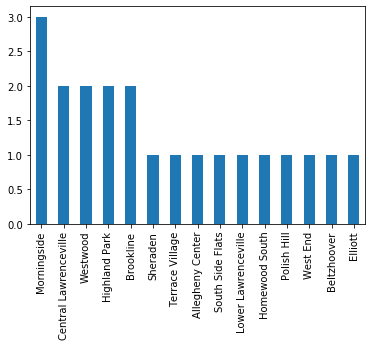

In [13]:
multi_purpose["neighborhood"].value_counts().plot(kind="bar")

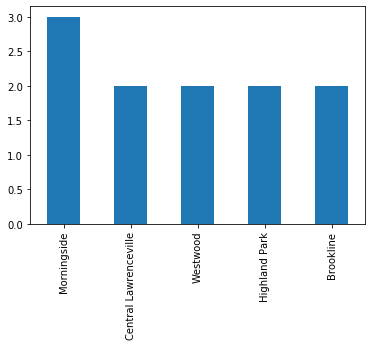

In [14]:
multi_purpose["neighborhood"].value_counts().head().plot(kind="bar")

In [15]:
has_lights = playing_fields["has_lights"] == "t"
fields_with_lights = playing_fields[has_lights]
fields_with_lights["neighborhood"].value_counts()

South Side Slopes           4
Carrick                     3
Mount Washington            3
Brookline                   3
Troy Hill                   3
Morningside                 3
Beechview                   2
Elliott                     2
Crafton Heights             2
Westwood                    2
Lower Lawrenceville         2
Bedford Dwellings           2
Greenfield                  2
Squirrel Hill South         2
Central Lawrenceville       2
Manchester                  1
Perry South                 1
Windgap                     1
Beltzhoover                 1
South Oakland               1
Fineview                    1
Sheraden                    1
Shadyside                   1
Lincoln-Lemington-Belmar    1
Terrace Village             1
Perry North                 1
Banksville                  1
Spring Hill-City View       1
Polish Hill                 1
Homewood South              1
Garfield                    1
Hazelwood                   1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that have lights.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

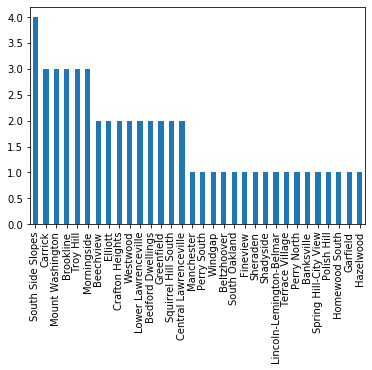

In [16]:
fields_with_lights["neighborhood"].value_counts().plot(kind="bar")

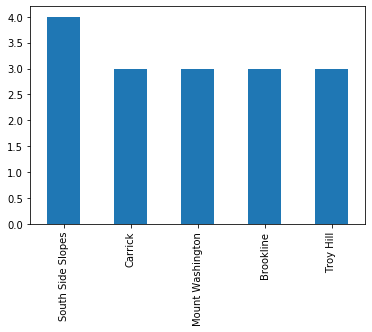

In [19]:
fields_with_lights["neighborhood"].value_counts().head().plot(kind="bar")

Now lets step away from the playing fields and begin to look at playgrounds in Pittsburgh.

In [24]:
playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
playgrounds.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021831
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


Let's check out the neighborhoods.

In [25]:
playgrounds["neighborhood"].unique()

array(['Beechview', 'Crawford-Roberts', 'Central Northside',
       'Bedford Dwellings', 'South Side Slopes', 'South Side Flats',
       'Lower Lawrenceville', 'Banksville', 'Homewood North', 'Bon Air',
       'Central Oakland', 'Brighton Heights', 'Brookline', 'Hazelwood',
       'Squirrel Hill South', 'Spring Garden', 'Lincoln-Lemington-Belmar',
       'Windgap', 'Troy Hill', 'Westwood', 'Perry South', 'Homewood West',
       'Allegheny Center', 'Strip District', 'Stanton Heights',
       'Crafton Heights', 'West Oakland', 'East Carnegie',
       'Duquesne Heights', 'East Liberty', 'Esplen', 'Fairywood',
       'Highland Park', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Greenfield', 'South Oakland',
       'Allentown', 'Hays', 'Elliott', 'Morningside', 'Terrace Village',
       'Larimer', 'Carrick', 'Central Lawrenceville', 'Lincoln Place',
       'Manchester', 'Marshall-Shadeland', 'Sheraden', 'Beltzhoover',
       'Shadyside', 'Mount Washington', 'Oakwo

That looks like quite a bit more than when we were looking at the playing fields. How many neighborhoods do we have here.

In [26]:
playgrounds["neighborhood"].nunique()

67

There's 16 more neighborhoods here! We'll have to account for that later when deciding which neighborhood is the best for your kids.

Now how many parks do we have exactly?

In [27]:
len(playgrounds)

121

That's a fair amount of playgrounds, just some quick math would recommend just under an average of 2 playgrounds per neighborhood.

Why don't we see how many playgrounds each neighborhood actually has?

In [29]:
playgrounds["neighborhood"].value_counts()

Squirrel Hill South         8
Beechview                   5
South Side Slopes           5
Allegheny Center            4
Highland Park               4
Sheraden                    4
Crawford-Roberts            3
Carrick                     3
Beltzhoover                 3
South Oakland               3
Elliott                     3
Mount Washington            3
Hazelwood                   3
Greenfield                  2
Crafton Heights             2
Lincoln Place               2
Bloomfield                  2
Troy Hill                   2
Manchester                  2
Brookline                   2
Brighton Heights            2
South Side Flats            2
Marshall-Shadeland          2
Upper Lawrenceville         2
Lincoln-Lemington-Belmar    2
Garfield                    2
East Liberty                2
Central Northside           2
Morningside                 2
Squirrel Hill North         1
                           ..
Shadyside                   1
Regent Square               1
East Carne

How about we make that more visual.

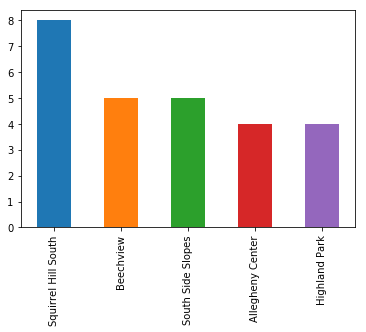

In [30]:
playgrounds["neighborhood"].value_counts().head().plot(kind="bar")

Wow! Immediately we see Squirrel Hill South with the most but a large margin, sitting on top with 8 playgrounds. Followed by Beechview and South Side Slopes tied with 5. So its safe to say Squirrel Hill South is the best neighborhood in terms of playgrounds, right?

Not necessarily, a big aspect of playground is having thing for everyone. Luckily for us, we have another dataset on playground equipment and whether they are ADA accessible. For those who don't know the ADA is the American with Disabilities Act, and sets guidelines on the accessibilty requirements of public and commercial land in order to prohibit discrimination against the disabled.

For example Chartiers Playground contains ADA accessible swings:
![ ](https://tools.wprdc.org/images/pittsburgh/playgrounds/Chartiers_Playground.jpg)

Now with this in mind lets pop our new database into pandas and run some of the same code one it.

In [32]:
playground_equipment = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
playground_equipment.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


In [35]:
playground_equipment["neighborhood"].unique()

array(['Beechview', 'Allegheny Center', 'Squirrel Hill South', 'Windgap',
       'Perry South', 'Crafton Heights', 'Fineview', 'Terrace Village',
       'Hazelwood', 'Lincoln Place', 'Sheraden', 'Brookline', 'Oakwood',
       'New Homestead', 'South Side Slopes', 'Upper Hill',
       'Brighton Heights', 'Allentown', 'East Liberty', 'Highland Park',
       'Central Northside', 'Bloomfield', 'Mount Washington', 'Shadyside',
       'Westwood', 'Hays', 'Polish Hill', 'Central Oakland',
       'Lincoln-Lemington-Belmar', 'Esplen', 'Greenfield',
       'Crawford-Roberts', 'Bedford Dwellings', 'Marshall-Shadeland',
       'Beltzhoover', 'West Oakland', 'Elliott', 'Spring Garden',
       'Homewood West', 'Strip District', 'Stanton Heights',
       'East Carnegie', 'Upper Lawrenceville', 'South Oakland',
       'Morningside', 'South Side Flats', 'Central Lawrenceville',
       'Manchester', 'Garfield', 'Lower Lawrenceville', 'Carrick',
       'Spring Hill-City View', 'Bluff', 'Middle Hill', 'Ba

In [37]:
playground_equipment["neighborhood"].nunique()

66

Uh oh, it seems we have one less neighborhood. That's okay, we'll assume that playground has no ADA accessible equipement when we get to the end.

In [38]:
playground_equipment["neighborhood"].value_counts()

Squirrel Hill South         32
Beechview                   21
Allegheny Center            15
South Side Slopes           14
Sheraden                    13
Hazelwood                   13
Highland Park               10
Mount Washington            10
Lincoln Place                9
Regent Square                9
Garfield                     9
Brighton Heights             8
East Liberty                 8
Fineview                     8
Manchester                   7
Greenfield                   7
Troy Hill                    7
Beltzhoover                  7
Carrick                      7
Bloomfield                   7
Brookline                    7
Elliott                      7
South Oakland                7
Banksville                   6
Lincoln-Lemington-Belmar     6
Perry North                  6
Swisshelm Park               6
Crawford-Roberts             6
Shadyside                    5
Windgap                      5
                            ..
Fairywood                    4
Allentow

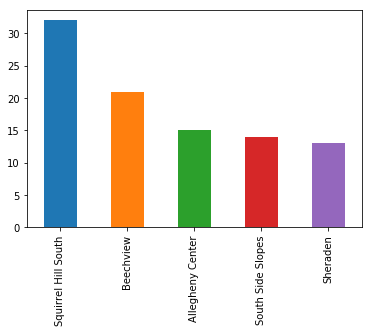

In [39]:
playground_equipment["neighborhood"].value_counts().head().plot(kind="bar")

So now we've arrived with a new graph featuring similar faces from the earlier graph. We still see Squirrel Hill South dominating the competition though. However, we have not filtered out the ADA accessible yet. So lets do that.

In [45]:
accessible = playground_equipment["ada_accessible"] == "t"
accessible_playgrounds = playground_equipment[accessible]

accessible_playgrounds.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
10,1811257536,Cross and Strauss Playground,Swing 2 Bays,Little Tykes,Pour in Place,t,NaN,Cross St,Perry South,6,26,42003261400,1,26,1,1-12,40.465189,-80.020173
15,490747758,Dunbar Playground,Swing 2 Bays,Playworld,Pour in Place,t,1201.0,Clairhaven St,Crafton Heights,2,28,42003281500,5,28,6,1-18,40.439321,-80.051894
18,595152426,Fineview Playground,Swing 2 Bays,Playworld,Greenpark Breakfall,t,NaN,Fineview Ave,Fineview,1,25,42003250900,1,25,1,1-10,40.461713,-80.003621


In [47]:
accessible_playgrounds["neighborhood"].value_counts()

Squirrel Hill South         7
Beechview                   4
South Side Slopes           4
Mount Washington            3
Highland Park               3
Sheraden                    3
Elliott                     3
East Liberty                2
Carrick                     2
Manchester                  2
Bloomfield                  2
South Side Flats            2
Crawford-Roberts            2
Hazelwood                   2
Beltzhoover                 2
Lincoln-Lemington-Belmar    2
Brighton Heights            2
Fineview                    2
Morningside                 2
Greenfield                  2
Lincoln Place               1
Duquesne Heights            1
Polish Hill                 1
West End                    1
Bon Air                     1
Garfield                    1
Allegheny Center            1
Oakwood                     1
Allentown                   1
Crafton Heights             1
Spring Garden               1
Perry South                 1
Point Breeze North          1
Central La

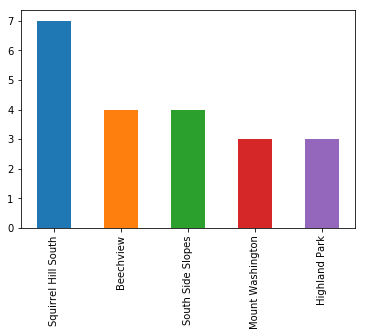

In [48]:
accessible_playgrounds["neighborhood"].value_counts().head().plot(kind="bar")

Even within ADA accessible playground equipment Squirrel Hill South remains on top, surprisingly we also see South Side Slopes return to its spot tied with Beechview in second after if dropped initially while looking at total playground equipment. Squirrel Hill South's numbers within each category will definitely earn it the top spot for playgrounds.